In [106]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [128]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


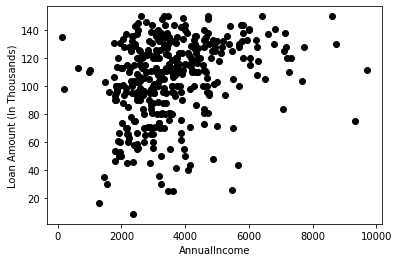

In [129]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

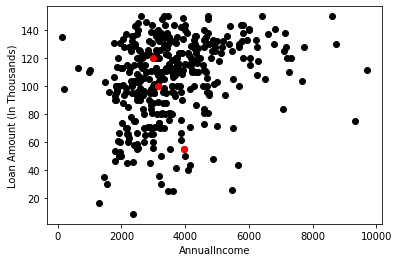

In [130]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [127]:
scaler = StandardScaler()
data = scaler.fit_transform(X)
data = pd.DataFrame(data)

In [7]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

C:\Users\Guddu\AppData\Local\Temp\ipykernel_13388\3142618123.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\Guddu\AppData\Local\Temp\ipykernel_13388\3142618123.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


0.0


C:\Users\Guddu\AppData\Local\Temp\ipykernel_13388\3142618123.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\Guddu\AppData\Local\Temp\ipykernel_13388\3142618123.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


In [131]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

KeyError: 'Cluster'

In [121]:
import numpy as np


class KMeans:
    """K-Means Class"""

    def __init__(self, data, num_clusters):
        """K-Means class constructor.
        :param data: training dataset.
        :param num_clusters: number of cluster into which we want to break the dataset.
        """
        self.data = pd.DataFrame(data)
        self.num_clusters = num_clusters
        self.centroids = None

    def train(self, max_iterations):
        """Function performs data clustering using K-Means algorithm
        :param max_iterations: maximum number of training iterations.
        """

        # Generate random centroids based on training set.
        centroids = KMeans.centroids_init(self.data, self.num_clusters)

        # Init default array of closest centroid IDs.
        num_examples = self.data.shape[0]
        closest_centroids_ids = np.empty((num_examples, 1))

        # Run K-Means.
        for _ in range(max_iterations):
            # Find the closest centroids for training examples.
            closest_centroids_ids = KMeans.centroids_find_closest(self.data, centroids)

            # Compute means based on the closest centroids found in the previous part.
            centroids = KMeans.centroids_compute(
                self.data,
                closest_centroids_ids,
                self.num_clusters
            )
        self.centroids = centroids

        return centroids, closest_centroids_ids

    @staticmethod
    def centroids_init(data, num_clusters):
        """Initializes num_clusters centroids that are to be used in K-Means on the dataset X
        :param data: training dataset.
        :param num_clusters: number of cluster into which we want to break the dataset.
        """

        # Get number of training examples.
        num_examples = data.shape[0]

        # Randomly reorder indices of training examples.
        random_ids = np.random.permutation(num_examples)

        # Take the first K examples as centroids.
        centroids = data.iloc[random_ids[:num_clusters], :]

        # Return generated centroids.
        return centroids

    @staticmethod
    def centroids_find_closest(data, centroids):
        """Computes the centroid memberships for every example.
        Returns the closest centroids in closest_centroids_ids for a dataset X where each row is
        a single example. closest_centroids_ids = m x 1 vector of centroid assignments (i.e. each
        entry in range [1..K]).
        :param data: training dataset.
        :param centroids: list of centroid points.
        """

        # Get number of training examples.
        num_examples = data.shape[0]

        # Get number of centroids.
        num_centroids = centroids.shape[0]
        # print("==========>>>>",type(centroids))
        # We need to return the following variables correctly.
        closest_centroids_ids = np.zeros((num_examples, 1))

        # Go over every example, find its closest centroid, and store
        # the index inside closest_centroids_ids at the appropriate location.
        # Concretely, closest_centroids_ids(i) should contain the index of the centroid
        # closest to example i. Hence, it should be a value in the range 1...num_centroids.
        for example_index in range(num_examples):
            distances = np.zeros((num_centroids, 1))
            for centroid_index in range(num_centroids):
                centroids = pd.DataFrame(centroids)
                distance_difference = data.iloc[example_index, :] - centroids.iloc[centroid_index, :]
                distances[centroid_index] = np.sum(distance_difference ** 2)
            closest_centroids_ids[example_index] = np.argmin(distances)

        return closest_centroids_ids
    
    def cost(self):
        """Computes the centroid memberships for every example.
        Returns the closest centroids in closest_centroids_ids for a dataset X where each row is
        a single example. closest_centroids_ids = m x 1 vector of centroid assignments (i.e. each
        entry in range [1..K]).
        :param data: training dataset.
        :param centroids: list of centroid points.
        """

        data = self.data
        num_examples = self.data.shape[0]
        num_centroids = self.num_clusters
        if type(self.centroids)==type(None):
            self.train(num_examples,100)
        centroids = self.centroids

        # Get number of training examples.
        #  = data.shape[0]

        # Get number of centroids.
        #  = centroids.shape[0]
        # print("==========>>>>",type(centroids))
        # We need to return the following variables correctly.
        closest_centroids_ids = np.zeros((num_examples, 1))

        # Go over every example, find its closest centroid, and store
        # the index inside closest_centroids_ids at the appropriate location.
        # Concretely, closest_centroids_ids(i) should contain the index of the centroid
        # closest to example i. Hence, it should be a value in the range 1...num_centroids.
        j = 0
        for example_index in range(num_examples):
            distances = np.zeros((num_centroids, 1))
            for centroid_index in range(num_centroids):
                centroids = pd.DataFrame(centroids)
                distance_difference = data.iloc[example_index, :] - centroids.iloc[centroid_index, :]
                distances[centroid_index] = np.sum(distance_difference ** 2)
            # print(distances)
            j += np.min(distances)
            # closest_centroids_ids[example_index] = np.argmin(distances)

        return j

    @staticmethod
    def centroids_compute(data, closest_centroids_ids, num_clusters):
        """Compute new centroids.
        Returns the new centroids by computing the means of the data points assigned to
        each centroid.
        :param data: training dataset.
        :param closest_centroids_ids: list of closest centroid ids per each training example.
        :param num_clusters: number of clusters.
        """

        # Get number of features.
        num_features = data.shape[1]

        # We need to return the following variables correctly.
        centroids = np.zeros((num_clusters, num_features))

        # Go over every centroid and compute mean of all points that
        # belong to it. Concretely, the row vector centroids(i, :)
        # should contain the mean of the data points assigned to
        # centroid i.
        for centroid_id in range(num_clusters):
            closest_ids = closest_centroids_ids == centroid_id
            centroids[centroid_id] = np.mean(data.iloc[closest_ids.flatten(), :], axis=0)

        return centroids

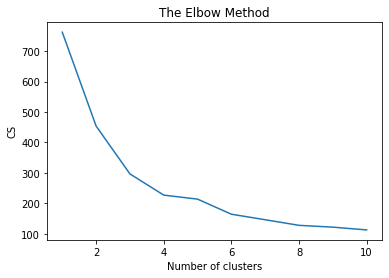

In [123]:
#################### from sklearn.cluster import KMeans

# k = 11
# cs = []
# for i in range(1, k):
#     # kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
#     kmeans = KMeans(data,i)
#     kmeans.train(5)
#     cs.append(kmeans.cost())
plt.plot(range(1, len(cs)+1), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

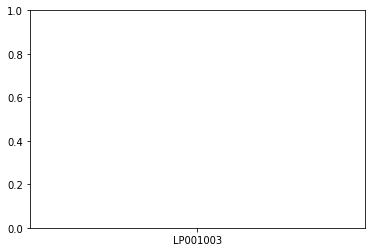

In [132]:
plt.scatter(data.iloc[:,0],data.iloc[:,1])
plt.show()


kmeans = KMeans(data.iloc[:,:2],3)
kmeans.train(10)
print(kmeans.cost())

In [85]:
data
type(None)==type(None)

True

In [68]:
# TRESTING
num_clusters = 1
num_examples = data.shape[0]

# Randomly reorder indices of training examples.
random_ids = np.random.permutation(num_examples)
print(data.shape,random_ids)
# Take the first K examples as centroids.
# centroids = data[[2,5], [2,4]]
# centroids = data.iloc[random_ids[:num_clusters], :]
# data.iloc([2,5],[2,1])
# data.iloc[4,:]
print(centroids.shape,type(centroids))
centroids.iloc[0,:]

(182, 6) [169 107  76 141 133 129  99  74  26  81  75  57   5  83 134 166 130 181
  67 152 179  89 156 109   7 147 121  61 146  49   1  70 118 149  12   8
 157 164  35 126 120 159  50  85  88 136  68  86 110  22   6  56 114 178
 163  91 101  38  41  71  65 106 177 112 123 135 122  18 162  77  45 158
  78  92 113  93 173  97  15  51  40  14 180  16 105  53  64 116 144  44
 103  98  28  29  59  31 168   3 104  84  52  42 137 125  48  62 155  95
 119  19 161  90 127  54 138  69  80 139  79  96  87  27  21 102 140 176
  34 148  17 131  43 142 100 132 108 145 117  36  37 154 128 115  72  66
  94  24  13   9 170 124  11 151 175  63  39 143  46  73  47 174  20   0
   2  58  60 172 111  10  30   4  23 165 160  25  32  33 171 167 153 150
  82  55]
(1, 6) <class 'pandas.core.frame.DataFrame'>


LoanAmount           47.000000
ApplicantIncome    1800.000000
1                  2234.477600
2                  4713.324891
3                   699.795059
Cluster               3.000000
Name: 28, dtype: float64